<h3>Практическое задание №6. Формула Кэмблелла для оценки
интерференции</h3>

Найдем коэффициент А как:
$$
A = \frac{P_tG_tG(\alpha)}{(4\pi)^2}
$$
Тогда полезная мощность:
$$
P_R = A r^{-2} e^{-Kr}
$$
Вероятность экспозиции:
$$
p_c = (\frac{\alpha}{2\pi})^2
$$
Вероятность прямой видимости будем считать при условии, что высота станции равна высоте блокировки для простоты:
$$
p_l = e^{-2\lambda_B R_B(R_B + r)}
$$
Тогда итоговая средняя интерференция:
$$
E(I) = \int^R_{R_B}P_Rp_cp_l 2\lambda_I\pi r \, dr
$$
Если подставить все функции и собрать итоговую формулу матожидания, то мы увидим, что аналитически интеграл не берётся, а, следовательно, придется использовать численные методы

In [59]:
import math;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy;

In [67]:
linear = lambda x: 10 ** (x / 10);
alpha = 0.4;
pc = lambda alpha : (alpha / 2 / math.pi) ** 2;

k = 0.1;
K = 0.3;
A = lambda alpha : linear(2 / (1 - math.cos(alpha / 2) + k * (1 + math.cos(alpha / 2)))) * linear(10) * linear(23) / (4 * math.pi) ** 2;
Pr = lambda r : r ** (-2) * math.exp(-K * r);

lmbdB = 0.2;
Rb = 1.5;
pl = lambda r : math.exp(-2 * lmbdB * Rb * (Rb + r));

R = 1000;
# Не учтена плотность интерф. устройств и угла направленности
underIntEI = lambda r: Pr(r) * pl(r) * 2 * math.pi * r;

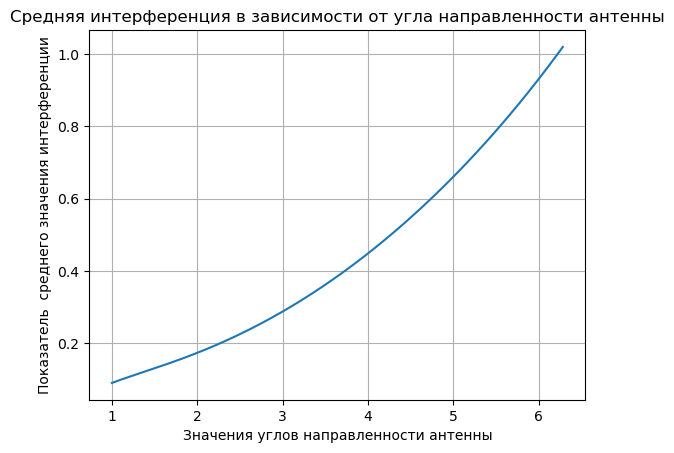

In [68]:
POINTS = 1000;

def getByAngle():
    lmbdI = 0.2;
    angles = np.linspace(1, 2 * math.pi, POINTS);
    result = np.zeros(POINTS);
    
    for i in range(POINTS):
        alpha = angles[i];
        (result[i], scale) = scipy.integrate.quad(underIntEI, Rb, R);
        result[i] *= pc(alpha) * lmbdI * A(alpha);
        
        
    plt.plot(angles, result);
    plt.xlabel("Значения углов направленности антенны");
    plt.ylabel("Показатель  среднего значения интерференции");
    plt.title("Средняя интерференция в зависимости от угла направленности антенны");
    plt.grid();
    
getByAngle();
plt.show();

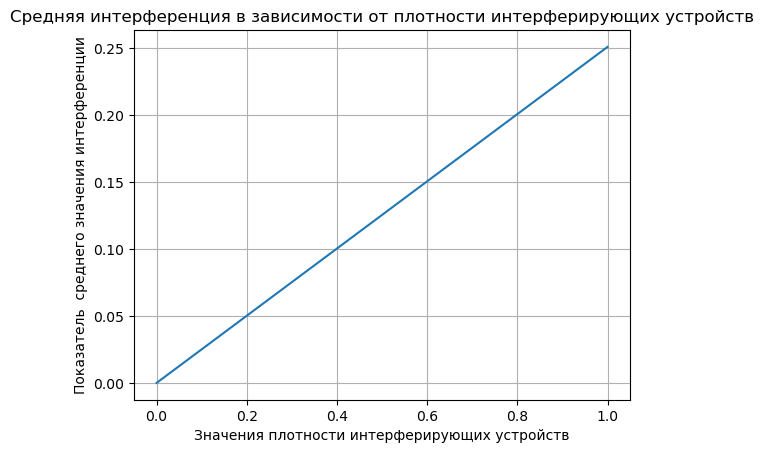

In [69]:
def getByLambdaI():
    alpha = 0.6;
    result = np.zeros(POINTS);
    lmbdsI = np.linspace(0, 1, POINTS);
    
    for i in range(POINTS):
        (result[i], scale) = scipy.integrate.quad(underIntEI, Rb, R);
        result[i] *= pc(alpha) * lmbdsI[i] * A(alpha);
        
        
    plt.plot(lmbdsI, result);
    plt.xlabel("Значения плотности интерферирующих устройств");
    plt.ylabel("Показатель  среднего значения интерференции");
    plt.title("Средняя интерференция в зависимости от плотности интерферирующих устройств");
    plt.grid();
    
getByLambdaI();
plt.show();

Теперь проделаем то же самое, но обнулим плотность блокировок:

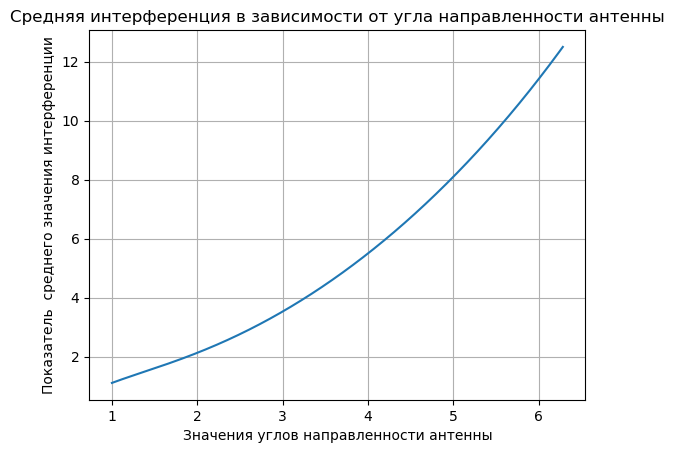

In [70]:
lmbdB = 0;

def getByAngle():
    lmbdI = 0.2;
    angles = np.linspace(1, 2 * math.pi, POINTS);
    result = np.zeros(POINTS);
    
    for i in range(POINTS):
        alpha = angles[i];
        (result[i], scale) = scipy.integrate.quad(underIntEI, Rb, R);
        result[i] *= pc(alpha) * lmbdI * A(alpha);
        
        
    plt.plot(angles, result);
    plt.xlabel("Значения углов направленности антенны");
    plt.ylabel("Показатель  среднего значения интерференции");
    plt.title("Средняя интерференция в зависимости от угла направленности антенны");
    plt.grid();
    
getByAngle();
plt.show();

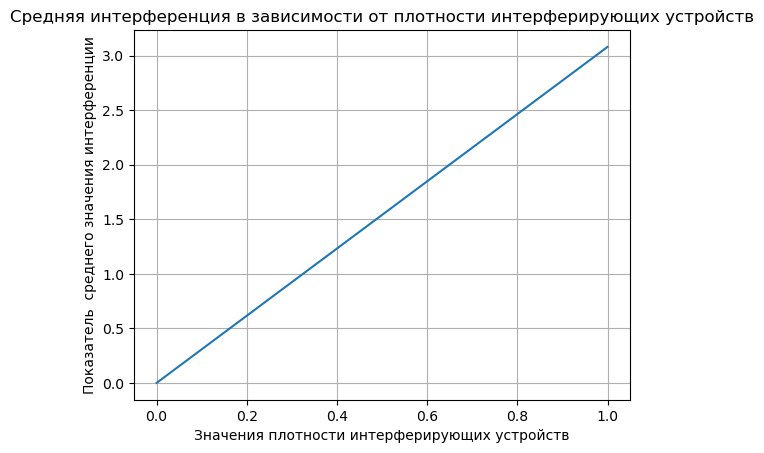

In [71]:
def getByLambdaI():
    alpha = 0.6;
    result = np.zeros(POINTS);
    lmbdsI = np.linspace(0, 1, POINTS);
    
    for i in range(POINTS):
        (result[i], scale) = scipy.integrate.quad(underIntEI, Rb, R);
        result[i] *= pc(alpha) * lmbdsI[i] * A(alpha);
        
        
    plt.plot(lmbdsI, result);
    plt.xlabel("Значения плотности интерферирующих устройств");
    plt.ylabel("Показатель  среднего значения интерференции");
    plt.title("Средняя интерференция в зависимости от плотности интерферирующих устройств");
    plt.grid();
    
getByLambdaI();
plt.show();

Построим для лучшей видимости 3D график для $\lambda_B$ = 0:

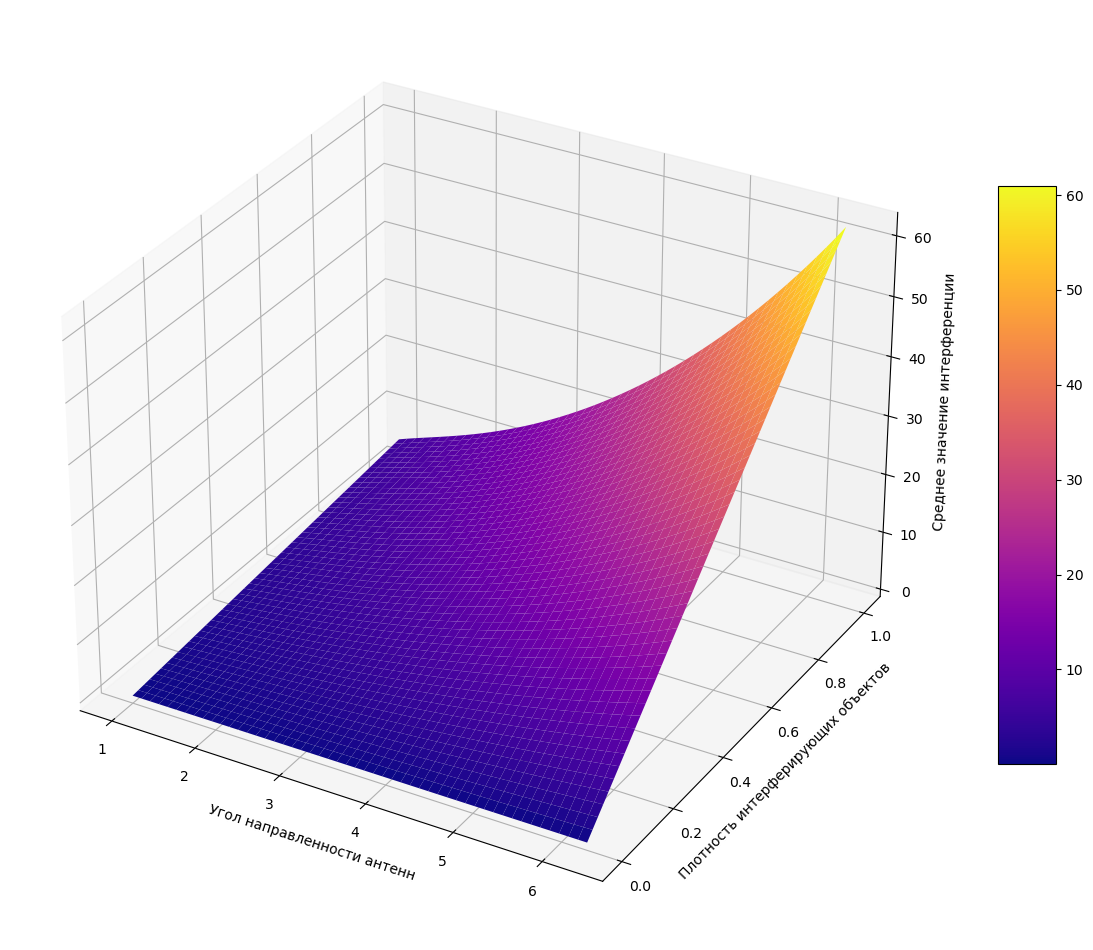

In [72]:
angles = np.linspace(1, 2 * math.pi, POINTS);
lmbdsI = np.linspace(0, 1, POINTS);

X, Y = np.meshgrid(angles, lmbdsI);

result = np.zeros((POINTS, POINTS));
(temp, scale) = scipy.integrate.quad(underIntEI, Rb, R);

for i in range(POINTS):
    for j in range(POINTS):
        result[i][j] = temp * pc(X[i][j]) * Y[i][j] * A(X[i][j]);

fig = plt.figure(figsize=(15, 15));
ax = fig.add_subplot(111, projection='3d');

scatter = ax.plot_surface(X, Y, result, cmap='plasma');

cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10);

ax.set_xlabel('Угол направленности антенн');
ax.set_ylabel('Плотность интерферирующих объектов');
ax.set_zlabel('Среднее значение интерференции');

plt.show();

Вернём $\lambda_B = 0.2$ и сделаем то же самое:

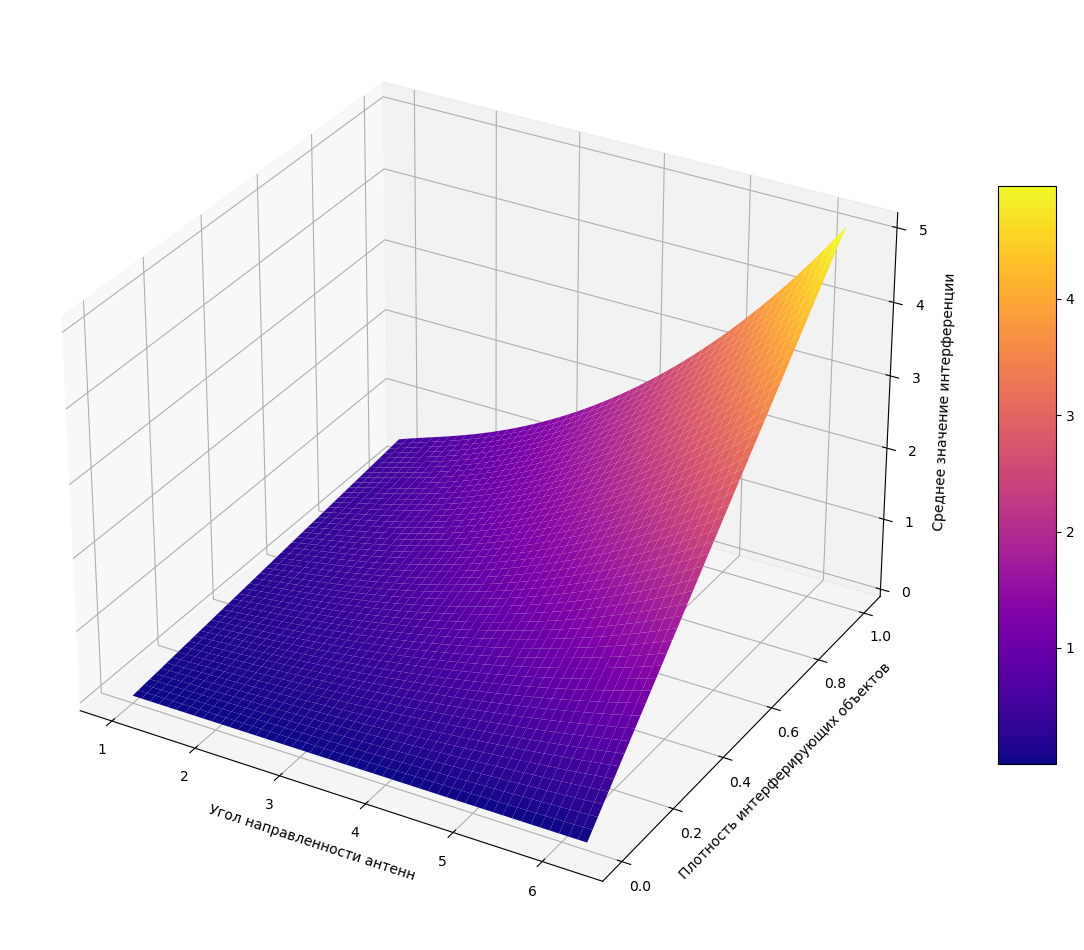

In [73]:
lmbdB = 0.2;

angles = np.linspace(1, 2 * math.pi, POINTS);
lmbdsI = np.linspace(0, 1, POINTS);

X, Y = np.meshgrid(angles, lmbdsI);

result = np.zeros((POINTS, POINTS));
(temp, scale) = scipy.integrate.quad(underIntEI, Rb, R);

for i in range(POINTS):
    for j in range(POINTS):
        result[i][j] = temp * pc(X[i][j]) * Y[i][j] * A(X[i][j]);

fig = plt.figure(figsize=(15, 15));
ax = fig.add_subplot(111, projection='3d');

scatter = ax.plot_surface(X, Y, result, cmap='plasma');

cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10);

ax.set_xlabel('Угол направленности антенн');
ax.set_ylabel('Плотность интерферирующих объектов');
ax.set_zlabel('Среднее значение интерференции');

plt.show();